In [1]:
'''Utilizar a string abaixo para execução dos códigos para Processamento de Linguagem Natural'''

text = "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
'''Contabilizando a quantidade de palavras na string disponibilizada'''

# concatenar as palavras
j_p = " ".join(s for s in text)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(j_p)))

Quantidade de Palavras: 273


## Tokenizar por Sentença

In [6]:
from nltk.tokenize import sent_tokenize

s_t = sent_tokenize(text)
print(s_t)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## Tokenizar por Palavra

In [7]:
from nltk.tokenize import word_tokenize

w_t = word_tokenize(text)
print(w_t)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


## Removendo pontuação e tokenizando por palavra.

In [8]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(text)

print(new_words)

['Hello', 'Mr', 'Smith', 'how', 'are', 'you', 'doing', 'today', 'The', 'weather', 'is', 'great', 'and', 'city', 'is', 'awesome', 'The', 'sky', 'is', 'pinkish', 'blue', 'You', 'shouldn', 't', 'eat', 'cardboard']


## StopWords

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
'''Chamando a lista com as stopwords em inglês e imprimindo a mesma.'''

stopWords_list = list(stopwords.words('english'))
words = new_words
print(stopWords_list)
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
'''Criando uma lista com as palavras sem os stopwords'''

tokens_without_sw = [word for word in words if not word in stopwords.words()]
print(tokens_without_sw)

['Hello', 'Mr', 'Smith', 'today', 'The', 'weather', 'great', 'city', 'awesome', 'The', 'sky', 'pinkish', 'blue', 'You', 'eat', 'cardboard']


## Stemming Porter

In [68]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
for w in tokens_without_sw:
    rootWord = ps.stem(w)
    print(rootWord)

hello
Mr
smith
today
the
weather
great
citi
awesom
the
sky
pinkish
blue
you
eat
cardboard


## Lemetização

In [69]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [71]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
	
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens_without_sw):
		lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
		print(token, "=>", lemma)

Hello => Hello
Mr => Mr
Smith => Smith
today => today
The => The
weather => weather
great => great
city => city
awesome => awesome
The => The
sky => sky
pinkish => pinkish
blue => blue
You => You
eat => eat
cardboard => cardboard


## Postag

In [74]:
tag = nltk.pos_tag(tokens_without_sw)
print(tag)

[('Hello', 'NNP'), ('Mr', 'NNP'), ('Smith', 'NNP'), ('today', 'NN'), ('The', 'DT'), ('weather', 'NN'), ('great', 'JJ'), ('city', 'NN'), ('awesome', 'VBP'), ('The', 'DT'), ('sky', 'NN'), ('pinkish', 'JJ'), ('blue', 'NN'), ('You', 'PRP'), ('eat', 'VBP'), ('cardboard', 'JJ')]


In [75]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
# result.draw() 

(S
  Hello/NNP
  Mr/NNP
  Smith/NNP
  (NP today/NN)
  (NP The/DT weather/NN)
  (NP great/JJ city/NN)
  awesome/VBP
  (NP The/DT sky/NN)
  (NP pinkish/JJ blue/NN)
  You/PRP
  eat/VBP
  cardboard/JJ)


## Gráfico de Frequência de palavras

In [82]:
from nltk.probability import FreqDist

FreqDist(tokens_without_sw)

FreqDist({'Hello': 1,
          'Mr': 1,
          'Smith': 1,
          'The': 2,
          'You': 1,
          'awesome': 1,
          'blue': 1,
          'cardboard': 1,
          'city': 1,
          'eat': 1,
          'great': 1,
          'pinkish': 1,
          'sky': 1,
          'today': 1,
          'weather': 1})

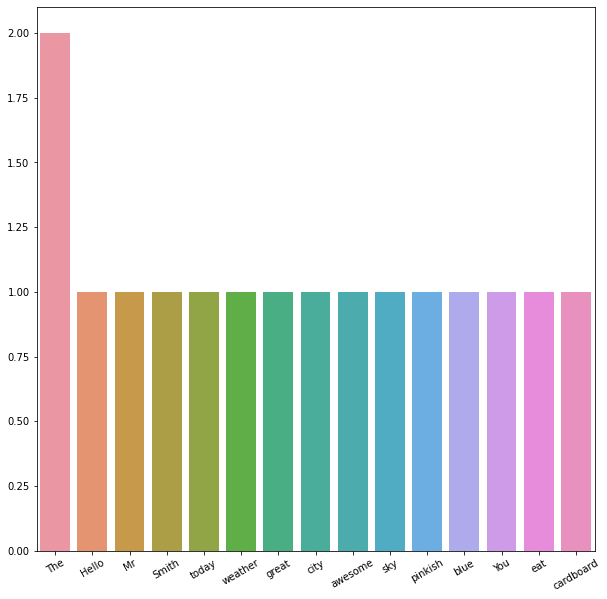

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(tokens_without_sw).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);